<h2>Importing Libraries and datasets</h2>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [2]:
#function to generate random colors
def randomColor(n):
    color = []
    colorArr = ['00','11','22','33','44','55','66','77','88','99','AA','BB','CC','DD','EE','FF']
    for _ in range(n):
        color.append('#' + colorArr[r.randint(0,15)] + colorArr[r.randint(0,15)] + colorArr[r.randint(0,15)])
    return color

In [3]:
#get datasets
traindf = pd.read_csv('/kaggle/input/titanic/train.csv')
display(traindf.head())
print(traindf.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


In [4]:
testdf = pd.read_csv('/kaggle/input/titanic/test.csv')
display(testdf.head())
print(testdf.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)


<h2>Exploratory Data Analysis</h2>

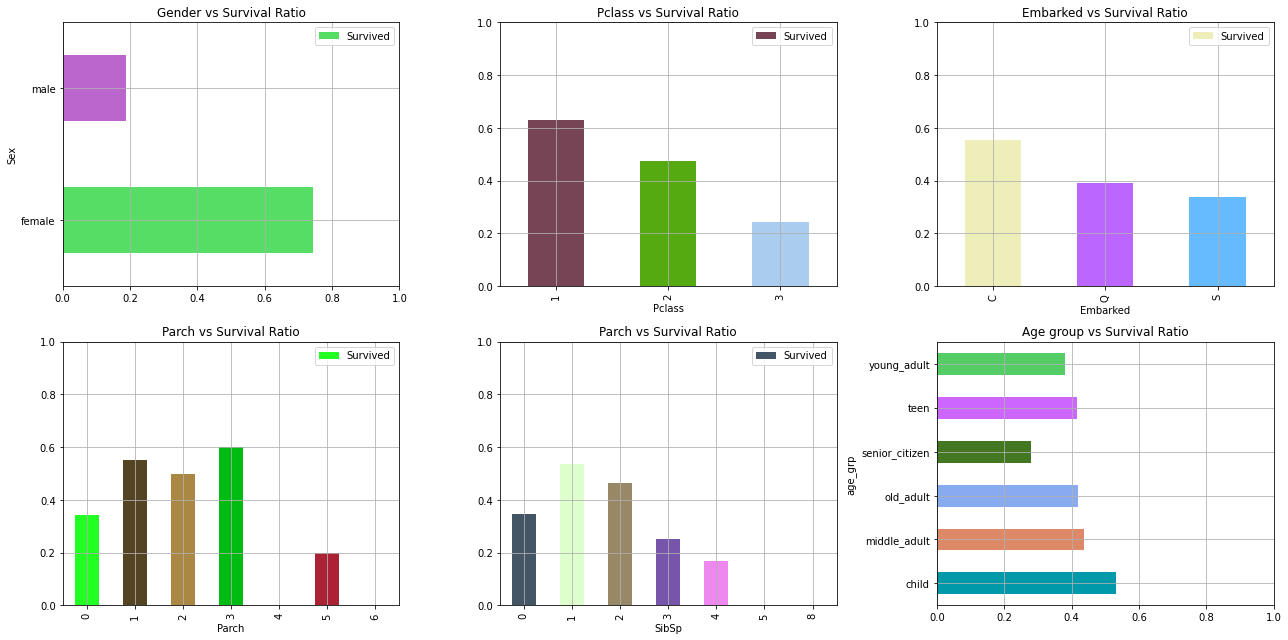

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (18,9))

#Gender vs Survuval Ratio
gender_survived = traindf[['Sex', 'Survived']].groupby('Sex').mean()
gender_survived.plot(kind='barh', 
                     color = [randomColor(len(gender_survived))], 
                     ax = axes[0,0],
                     title = 'Gender vs Survival Ratio',
                     xlim = (0,1),
                     grid = True,)

#Pclass vs Survival Ratio
pclass_survived = traindf[['Pclass', 'Survived']].groupby('Pclass').mean()
pclass_survived.plot(kind='bar', 
                     color = [randomColor(len(pclass_survived))], 
                     ax=axes[0,1],
                     title = 'Pclass vs Survival Ratio',
                     ylim = (0,1),
                     grid = True,)

#Embarked vs Survival Ratio
embarked_survived = traindf[['Embarked', 'Survived']].groupby('Embarked').mean()
embarked_survived.plot(kind='bar', 
                       color = [randomColor(len(embarked_survived))], 
                       ax=axes[0,2],
                       title = 'Embarked vs Survival Ratio',
                       ylim = (0,1),
                       grid = True,)

#Parch vs Survival Ratio
parch_survived = traindf[['Parch', 'Survived']].groupby('Parch').mean()
parch_survived.plot(kind='bar', 
                    color = [randomColor(len(parch_survived))], 
                    ax=axes[1,0], 
                    title = 'Parch vs Survival Ratio',
                    ylim = (0,1),
                    grid = True,)

#SibSp vs Survival Ratio
sibsp_survived = traindf[['SibSp', 'Survived']].groupby('SibSp').mean()
sibsp_survived.plot(kind='bar', 
                    color = [randomColor(len(sibsp_survived))], 
                    ax=axes[1,1],
                    title = 'Parch vs Survival Ratio',
                    ylim = (0,1),
                    grid = True,)

#Age Group vs Survival Ratio
agegrp = {'child':(0,13), 'teen':(13,20), 'young_adult':(20,35), 'middle_adult':(35,45), 'old_adult':(45,60), 'senior_citizen':(60,100)}
age_survival = traindf[['Age','Survived']].dropna().reset_index(drop=True)
age_survival['age_grp'] = None

for i in range(len(age_survival)):
    for grp in agegrp:
        temp = agegrp[grp]
        if age_survival.loc[i,'Age'] in range(temp[0],temp[1]):
            age_survival.loc[i,'age_grp'] = grp
            break
            
age_survival = age_survival.drop(columns=['Age']).groupby('age_grp').mean()

age_survival.plot(kind= 'barh', 
                  color = [randomColor(6)], 
                  legend=False, ax=axes[1,2],
                  title = 'Age group vs Survival Ratio',
                  xlim = (0,1),
                  grid = True,)

fig.tight_layout()
fig.show()

<h2>Preprocessing</h2>

In [6]:
traindf2 = traindf[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]

In [7]:
missingdf = traindf2.transpose()
missingdf['missing values'] = missingdf.apply(lambda x: len(traindf)-x.count(), axis=1)
missingdf = missingdf[['missing values']]
missingdf

,missing values
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Embarked,2


In [8]:
traindf2.drop(columns=['Age'], inplace=True)
traindf2['Embarked'].fillna(traindf2['Embarked'].mode()[0], inplace=True)
display(traindf2.head())

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [9]:
y = traindf2["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
X = pd.concat([pd.get_dummies(traindf2[features[0]]),pd.get_dummies(traindf2[features[1:]])], axis = 1, sort = False)
display(X.head())
print(X.shape)

,1,2,3,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,1,0,0,1,0,0,1
1,1,0,0,1,0,1,0,1,0,0
2,0,0,1,0,0,1,0,0,0,1
3,1,0,0,1,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,0,1


(891, 10)


In [10]:
#All values have been converted to categorical variables
#Normalizing data not required
#X = preprocessing.StandardScaler.fit(X).transform(X)

In [11]:
#importing ML packages
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [12]:
#Train-test split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 5)

<h2>KNN Classifier</h2>

Max KNN Accuracy : 82.1229


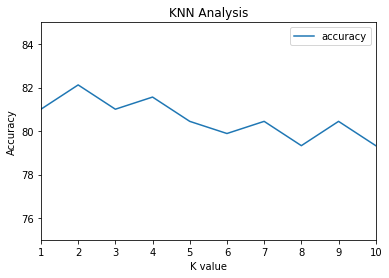

In [13]:
kval = [i for i in range(1,11)]
knnArr = []

for k in kval:
    knnmodel = KNeighborsClassifier(n_neighbors = k)
    knnmodel.fit(xtrain,ytrain)
    knnArr.append(round(accuracy_score(ytest, knnmodel.predict(xtest))*100, 4))
    
knndf = pd.DataFrame({'kval':kval, 'accuracy':knnArr}).set_index('kval')
knndf.plot(kind='line', ylim=(75,85))
plt.title('KNN Analysis')
plt.xlabel('K value')
plt.ylabel('Accuracy')
print('Max KNN Accuracy :',max(knnArr))

<h2>SVM Classifier : Poly, rbf</h2>

Max SVM Poly Accuracy : 82.1229


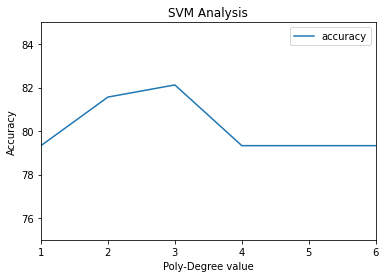

In [14]:
degreeval = [i for i in range(1,7)]
svmPolyArr = []
for d in degreeval:
    svmmodel = svm.SVC(kernel='poly', degree=d)
    svmmodel.fit(xtrain, ytrain)
    svmPolyArr.append(round(accuracy_score(ytest, svmmodel.predict(xtest))*100, 4))
    
svmpolydf = pd.DataFrame({'degreeval':degreeval, 'accuracy':svmPolyArr}).set_index('degreeval')
svmpolydf.plot(kind='line', ylim=(75,85))
plt.title('SVM Analysis')
plt.xlabel('Poly-Degree value')
plt.ylabel('Accuracy')
print('Max SVM Poly Accuracy :', max(svmPolyArr))

Max SVM rbf Accuracy : 82.1229


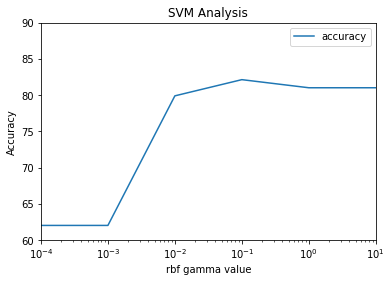

In [15]:
gammaval = [0.0001, 0.001, 0.01, 0.1, 1, 10]
svmrbfArr = []
for g in gammaval:
    svmmodel2 = svm.SVC(kernel='rbf', gamma = g)
    svmmodel2.fit(xtrain, ytrain)
    svmrbfArr.append(round(accuracy_score(ytest, svmmodel2.predict(xtest))*100, 4))

svmrbfdf = pd.DataFrame({'gammaval':gammaval, 'accuracy':svmrbfArr}).set_index('gammaval')
svmrbfdf.plot(kind='line', ylim=(60,90), logx = True)
plt.title('SVM Analysis')
plt.xlabel('rbf gamma value')
plt.ylabel('Accuracy')
print('Max SVM rbf Accuracy :', max(svmrbfArr))

<h2>Decision Tree Classifier</h2>

Max Decison Tree Accuracy : 82.6816


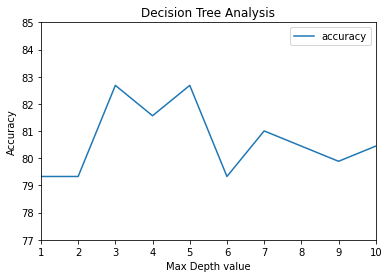

In [16]:
depthval = [i for i in range(1, 11)]
dtArr = []

for d in depthval:
    dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    dtmodel.fit(xtrain, ytrain)
    dtArr.append(round(accuracy_score(ytest, dtmodel.predict(xtest))*100, 4))
    
dtdf = pd.DataFrame({'depthval':depthval, 'accuracy':dtArr}).set_index('depthval')
dtdf.plot(kind='line', ylim=(77,85))
plt.title('Decision Tree Analysis')
plt.xlabel('Max Depth value')
plt.ylabel('Accuracy')
print('Max Decison Tree Accuracy :', max(dtArr))

<h2>Logistic Regression Classifier</h2>

Max Logistic Regression Accuracy : 81.5642


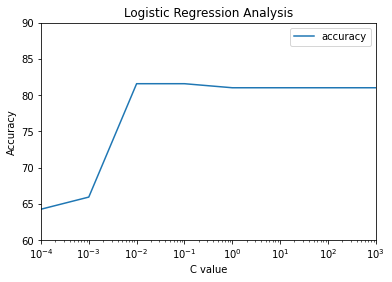

In [17]:
cval = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
lrArr = []

for c in cval:
    lrmodel = LogisticRegression(solver="liblinear", C = c)
    lrmodel.fit(xtrain, ytrain)
    lrArr.append(round(accuracy_score(ytest, lrmodel.predict(xtest))*100, 4))
    
lrdf = pd.DataFrame({'cval':cval, 'accuracy':lrArr}).set_index('cval')
lrdf.plot(kind='line', ylim=(60,90), logx = True)
plt.title('Logistic Regression Analysis')
plt.xlabel('C value')
plt.ylabel('Accuracy')
print('Max Logistic Regression Accuracy :', max(lrArr))

<h2>Random Forest Classifier</h2>

Max Random Forest Accuracy : 82.6816


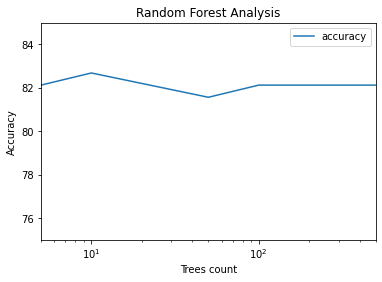

In [18]:
treesval = [5,10,50,100,500]
rfArr = []

for t in treesval:
    rfmodel = RandomForestClassifier(n_estimators=t, max_depth=3) #increasing max depth was not producing any better results.
    rfmodel.fit(xtrain, ytrain)
    rfArr.append(round(accuracy_score(ytest, rfmodel.predict(xtest))*100, 4))
    
rfdf = pd.DataFrame({'depthval':treesval, 'accuracy':rfArr}).set_index('depthval')
rfdf.plot(kind='line', ylim=(75,85), logx = True)
plt.title('Random Forest Analysis')
plt.xlabel('Trees count')
plt.ylabel('Accuracy')
print('Max Random Forest Accuracy :', max(rfArr))

<h2>Naive Bayes Classifiers</h2>

Max Naive Bayes Accuracy : 79.8883


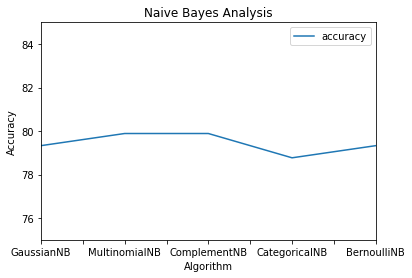

In [19]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, CategoricalNB, BernoulliNB
nbclass = ['GaussianNB', 'MultinomialNB', 'ComplementNB', 'CategoricalNB', 'BernoulliNB']
nbArr = []
gnb = BernoulliNB()
mnb = MultinomialNB()
compnb = ComplementNB()
catnb = CategoricalNB()
bnb = BernoulliNB()

nbArr.append(round(accuracy_score(ytest, gnb.fit(xtrain, ytrain).predict(xtest))*100,4))
nbArr.append(round(accuracy_score(ytest, mnb.fit(xtrain, ytrain).predict(xtest))*100,4))
nbArr.append(round(accuracy_score(ytest, compnb.fit(xtrain, ytrain).predict(xtest))*100,4))
nbArr.append(round(accuracy_score(ytest, catnb.fit(xtrain, ytrain).predict(xtest))*100,4))
nbArr.append(round(accuracy_score(ytest, bnb.fit(xtrain, ytrain).predict(xtest))*100,4))

nbdf = pd.DataFrame({'classifier': nbclass, 'accuracy':nbArr}).set_index('classifier')
nbdf.plot(kind='line', ylim=(75,85))
plt.title('Naive Bayes Analysis')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
print('Max Naive Bayes Accuracy :', max(nbArr))

<h3>Decision Tree Classifier Turns out to be the best fit for this dataset.<br>Thus we will use decision tree classifier to train using the entire dataset and predict on the test set.<br> Random Forest aslo produced the same accuracy, bur it is more computationally expensive.</h3>

In [20]:
#train odel using entire dataset
dtmodelfinal = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
dtmodelfinal.fit(X, y)
print('Training accuracy over entire dataset:')
print(round(accuracy_score(y, dtmodelfinal.predict(X))*100, 4))

Training accuracy over entire dataset:
83.7262


<h3>While training over the entire dataset max_depth of 10 is producing the highest accuracy.<br>
This actually makes sense, as the total number of features was finally 10.</h3>

In [21]:
len(testdf[features].dropna())

418

<h4> As the length of test dataset after dropping missing values is still 418,<br>
our features don't contain any missing values.</h4>

In [22]:
Xfinaltest = pd.concat([pd.get_dummies(testdf[features[0]]),pd.get_dummies(testdf[features[1:]])], axis = 1, sort = False)
display(Xfinaltest.head())

,1,2,3,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,0,1
2,0,1,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,1,0,0,1
4,0,0,1,1,1,1,0,0,0,1


In [23]:
#make prediction on test dataset
Ypred = dtmodelfinal.predict(Xfinaltest)

In [24]:
resultdf = pd.DataFrame({'PassengerId': testdf['PassengerId'], 'Survived': Ypred})
display(resultdf.head())
resultdf.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Your submission was successfully saved!
